In [64]:
import sys, os
from os.path import join, dirname, abspath
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure, Axes
import numpy as np
import networkx as nx
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from directions import *
from string import ascii_uppercase
plt.rcParams.update({
    "text.usetex": False,
    "ytick.minor.visible":True,
    "xtick.minor.visible":True,
    'xtick.direction': "in",
    'ytick.direction': "in"
})
outdir = "out"
os.makedirs(outdir,exist_ok=True)
def out(fname): return join(outdir,fname)
def savefig(plot_name): 
    plt.savefig(out(plot_name),bbox_inches="tight",dpi=250)
    
import pandas as pd
from numpy.linalg import matrix_power, eig

def arr_to_latex(M):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r'\\' + '\n').join('&'.join(str(x) for x in row) for row in M) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

def vec_to_latex(x,round=3):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r' \\ ').join(str(np.round(v,round)) for v in x) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

In [65]:
from car import Car
from tiles import Road, Exit, Onramp
from world import World

In [66]:
GRID_WIDTH = 5
GRID_HEIGHT = 6

In [67]:
road_tiles = []
for i in range(0,GRID_WIDTH):
    for j in range(0,GRID_HEIGHT):
        if not ((j == 2 or j == 3) and i == 2):
            road_tiles.append(Road(i,j,np.ones(9)/9))
len(road_tiles)

28

In [68]:
car = Car(road_tiles[0],desired_speed=1)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667]
changing neighbor 0 idx 4 (prev 0.16666666666666666) of Road(0,1,occupied=False) to 0
0.16666666666666666 [0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.2] [0 1 2 3 8]
[0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125]
changing neighbor 1 idx 5 (prev 0.125) of Road(1,1,occupied=False) to 0
0.125 [0.14285714 0.         0.14285714 0.14285714 0.14285714 0.
 0.14285714 0.14285714 0.14285714] [0 2 3 4 6 7 8]
[0.16666667 0.16666667 0.16666667 0.         0.         0.
 0.16666667 0.16666667 0.16666667]
changing neighbor 2 idx 6 (prev 0.16666666666666666) of Road(1,0,occupied=False) to 0
0.16666666666666666 [0.2 0.2 0.2 0.  0.  0.  0.  0.2 0.2] [0 1 2 7 8]


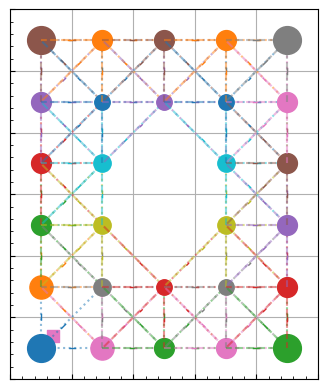

In [69]:
w = World(tiles=road_tiles,cars=[car])
w.draw()

driving order: [0]
car <car.Car object at 0x00000136E3525340>: I'm going to Road(1,0,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,1,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667] [0 1 2 3 8]
changing neighbor 1 idx 5 (prev 0.0) of Road(1,1,occupied=False) to 0.125
0.125 [0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125] [0 2 3 4 6 7 8]
changing neighbor 2 idx 6 (prev 0.0) of Road(1,0,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.         0.         0.
 0.16666667 0.16666667 0.16666667] [0 1 2 7 8]
[0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125]
changing neighbor 0 idx 4 (prev 0.125) of Road(1,1,occupied=False) to 0
0.125 [0.14285714 0.         0.14285714 0.14285714 0.         0.14285714
 0.14285714 0.14285714 0.14285714] [0 2 3 5 6 7 8]
[0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
changing n

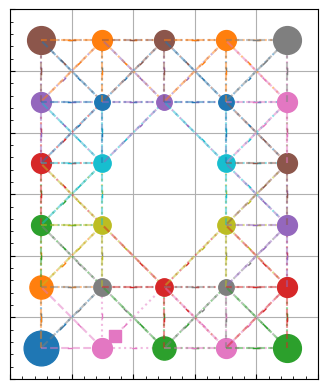

In [70]:
w.do_simulation_step()
w.draw()

changing neighbor 0 idx 4 (prev 0.0) of Road(1,1,occupied=False) to 0.125
0.125 [0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125] [0 2 3 5 6 7 8]
changing neighbor 1 idx 5 (prev 0.0) of Road(2,1,occupied=False) to 0.125
0.125 [0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125] [1 2 3 4 6 7 8]
changing neighbor 2 idx 6 (prev 0.0) of Road(2,0,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.         0.         0.
 0.16666667 0.16666667 0.16666667] [0 1 2 7 8]
changing neighbor 6 idx 2 (prev 0.0) of Road(0,0,occupied=False) to 0.25
0.25 [0.25 0.25 0.25 0.   0.   0.   0.   0.   0.25] [0 1 8]
changing neighbor 7 idx 3 (prev 0.0) of Road(0,1,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667] [0 1 2 4 8]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667]
changing neighbor 0 idx 4 (prev 0.1666666

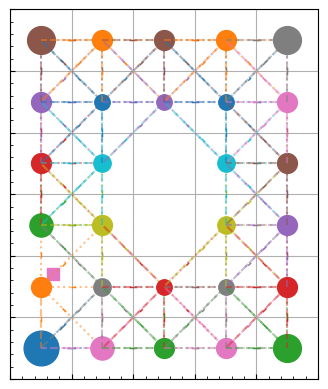

In [71]:
car.reset()
car.move_to(road_tiles[1])
w.draw()
car.reset()

changing neighbor 0 idx 4 (prev 0.0) of Road(0,2,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667] [0 1 2 3 8]
changing neighbor 1 idx 5 (prev 0.0) of Road(1,2,occupied=False) to 0.14285714285714285
0.14285714285714285 [0.14285714 0.         0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.14285714 0.14285714] [0 3 4 6 7 8]
changing neighbor 2 idx 6 (prev 0.0) of Road(1,1,occupied=False) to 0.125
0.125 [0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125] [0 2 3 4 5 7 8]
changing neighbor 3 idx 7 (prev 0.0) of Road(1,0,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.         0.         0.
 0.16666667 0.16666667 0.16666667] [0 1 2 6 8]
changing neighbor 4 idx 0 (prev 0.0) of Road(0,0,occupied=False) to 0.25
0.25 [0.25 0.25 0.25 0.   0.   0.   0.   0.   0.25] [1 2 8]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0. 

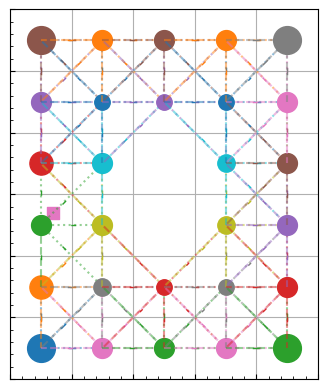

In [72]:
car.move_to(road_tiles[2])
w.draw()
car.reset()

In [73]:
road_tiles[0].p_directions

array([0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25])

In [74]:
np.sum(road_tiles[0].p_directions)

np.float64(1.0)

In [75]:
NUM_FRAMES = 10

driving order: [0]
car <car.Car object at 0x00000136E3525340>: I'm going to Road(1,2,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,3,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667] [0 1 2 3 8]
changing neighbor 1 idx 5 (prev 0.0) of Road(1,3,occupied=False) to 0.14285714285714285
0.14285714285714285 [0.14285714 0.14285714 0.         0.         0.14285714 0.14285714
 0.14285714 0.14285714 0.14285714] [0 1 4 6 7 8]
changing neighbor 2 idx 6 (prev 0.0) of Road(1,2,occupied=False) to 0.14285714285714285
0.14285714285714285 [0.14285714 0.         0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.14285714 0.14285714] [0 3 4 5 7 8]
changing neighbor 3 idx 7 (prev 0.0) of Road(1,1,occupied=False) to 0.125
0.125 [0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125] [0 2 3 4 5 6 8]
changing neighbor 4 idx 0 (prev 0.0) of Road(0,1,occupied=False) to 0.16666666666666

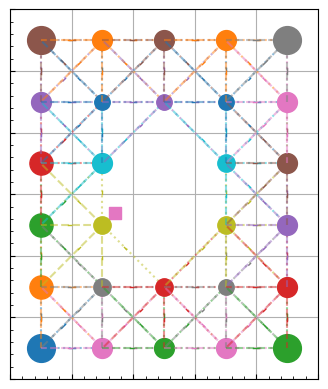

driving order: [0]
car <car.Car object at 0x00000136E3525340>: I'm going to Road(0,1,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(1,3,occupied=False) to 0.14285714285714285
0.14285714285714285 [0.14285714 0.14285714 0.         0.         0.14285714 0.14285714
 0.14285714 0.14285714 0.14285714] [0 1 5 6 7 8]
changing neighbor 3 idx 7 (prev 0.0) of Road(2,1,occupied=False) to 0.125
0.125 [0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125] [1 2 3 4 5 6 8]
changing neighbor 4 idx 0 (prev 0.0) of Road(1,1,occupied=False) to 0.125
0.125 [0.125 0.    0.125 0.125 0.125 0.125 0.125 0.125 0.125] [2 3 4 5 6 7 8]
changing neighbor 5 idx 1 (prev 0.0) of Road(0,1,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.
 0.         0.         0.16666667] [0 2 3 4 8]
changing neighbor 6 idx 2 (prev 0.0) of Road(0,2,occupied=False) to 0.16666666666666666
0.16666666666666666 [0.16666667 0.16666667 0.16666667 0.16666667 0.1

In [76]:
fig, ax = plt.subplots()

def update(frame):
    ax.cla()
    w.do_simulation_step()
    w.draw(ax=ax)

ani = animation.FuncAnimation(fig,update,frames=NUM_FRAMES,interval=500)
ani.save(filename=out("driving.gif"), writer="pillow",dpi=150)

In [77]:
straight_road = []
for i in range(10):
    straight_road.append(Road(0,i,[0.9,0,0,0,0,0,0,0,0.1]))

In [78]:
car1 = Car(straight_road[1],1)
car2 = Car(straight_road[0],2)

In [79]:
w = World(tiles=straight_road,cars=[car1,car2])

[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,2,occupied=False) to 0
0.0 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [0 8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,0,occupied=False) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,1,occupied=True) to 0
0.0 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [0 8]


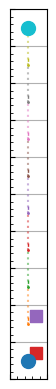

driving order: [1 0]
car <car.Car object at 0x00000136DF4E8860>: I'm going to Road(0,0,occupied=True)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,1,occupied=True) to 0.0
0.0 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [0 8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,1,occupied=True) to 0
0.0 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [0 8]
car <car.Car object at 0x00000136DEDED520>: I'm going to Road(0,2,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,2,occupied=False) to 0.0
0.0 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [0 8]
changing neighbor 4 idx 0 (prev 0.0) of Road(0,0,occupied=True) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,3,occupied=False) to 0
0.0 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [0 8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,1,occupied=False) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
dr

In [80]:
w.run(steps=10,draw=True,outpath=out("driving_straight.gif"),markersize=10)

driving order: [1 0]
car <car.Car object at 0x00000136DF4E8860>: I'm going to Road(0,8,occupied=True)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,9,occupied=True) to 0.0
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
changing neighbor 4 idx 0 (prev 0.0) of Road(0,7,occupied=False) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,9,occupied=True) to 0
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,7,occupied=False) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
car <car.Car object at 0x00000136DEDED520>: I'm going to Road(0,9,occupied=True)!
changing neighbor 4 idx 0 (prev 0.0) of Road(0,8,occupied=True) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,8,occupied=True) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]


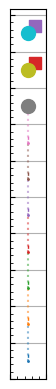

driving order: [1 0]
car <car.Car object at 0x00000136DF4E8860>: I'm going to Road(0,8,occupied=True)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,9,occupied=True) to 0.0
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
changing neighbor 4 idx 0 (prev 0.0) of Road(0,7,occupied=False) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,9,occupied=True) to 0
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,7,occupied=False) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
car <car.Car object at 0x00000136DEDED520>: I'm going to Road(0,9,occupied=True)!
changing neighbor 4 idx 0 (prev 0.0) of Road(0,8,occupied=True) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,8,occupied=True) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
driving order: [0 1]
car <car.Car object at 0x00

In [81]:
fig, ax = plt.subplots()

def update(frame):
    ax.cla()
    w.do_simulation_step()
    w.draw(ax=ax,markersize=10)

ani = animation.FuncAnimation(fig,update,frames=NUM_FRAMES,interval=500)
ani.save(filename=out("driving_straight.gif"), writer="pillow",dpi=150)

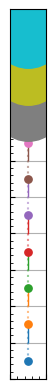

In [82]:
w.draw()

In [83]:
w.do_simulation_step()

driving order: [0 1]
car <car.Car object at 0x00000136DEDED520>: I'm going to Road(0,9,occupied=True)!
changing neighbor 4 idx 0 (prev 0.0) of Road(0,8,occupied=True) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,8,occupied=True) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
car <car.Car object at 0x00000136DF4E8860>: I'm going to Road(0,8,occupied=True)!
changing neighbor 0 idx 4 (prev 0.0) of Road(0,9,occupied=True) to 0.0
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
changing neighbor 4 idx 0 (prev 0.0) of Road(0,7,occupied=False) to 0.9
0.9 [0.9 0.  0.  0.  0.  0.  0.  0.  0.1] [8]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
changing neighbor 0 idx 4 (prev 0.0) of Road(0,9,occupied=True) to 0
0.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
[0.9 0.  0.  0.  0.  0.  0.  0.  0.1]
changing neighbor 4 idx 0 (prev 0.9) of Road(0,7,occupied=False) to 0
0.9 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]


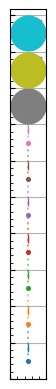

In [84]:
w.draw(markersize=25)

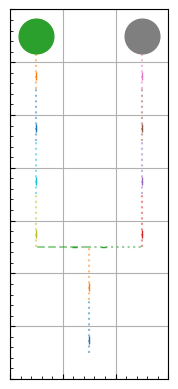

In [85]:
intersection_tiles = []

MAIN_X = 1

intersection_tiles.append(Road(MAIN_X,0,NORTH))
intersection_tiles.append(Road(MAIN_X,1,NORTH))
intersection_tiles.append(Road(MAIN_X,2,(NORTH+EAST+WEST)/3))

intersection_tiles.append(Road(MAIN_X+1,2,NORTH))
intersection_tiles.append(Road(MAIN_X+1,3,NORTH))
intersection_tiles.append(Road(MAIN_X+1,4,NORTH))
intersection_tiles.append(Road(MAIN_X+1,5,NORTH))
intersection_tiles.append(Road(MAIN_X+1,6,NORTH))

intersection_tiles.append(Road(MAIN_X-1,2,NORTH))
intersection_tiles.append(Road(MAIN_X-1,3,NORTH))
intersection_tiles.append(Road(MAIN_X-1,4,NORTH))
intersection_tiles.append(Road(MAIN_X-1,5,NORTH))
intersection_tiles.append(Road(MAIN_X-1,6,NORTH))



intersection = World(tiles=intersection_tiles,cars=[])
intersection.draw(markersize=25)

In [86]:
car = Car(tile=intersection_tiles[0],desired_speed=1)
intersection.add_car(car)

[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 0 idx 4 (prev 0.0) of Road(1,1,occupied=False) to 0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]


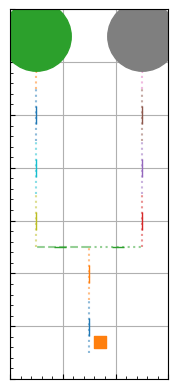

In [87]:
intersection.draw()

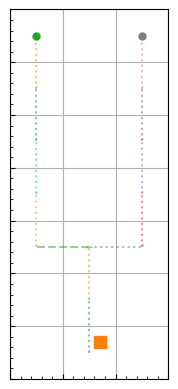

driving order: [0]
car <car.Car object at 0x00000136DF9C98B0>: I'm going to Road(1,1,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(1,1,occupied=False) to 0.0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
[0.  0.  0.5 0.  0.  0.  0.5 0.  0. ]
changing neighbor 0 idx 4 (prev 0.0) of Road(1,2,occupied=False) to 0
0.0 [0.  0.  0.5 0.  0.  0.  0.5 0.  0. ] [2 6]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 1 idx 5 (prev 0.0) of Road(2,2,occupied=False) to 0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 4 idx 0 (prev 1.0) of Road(1,0,occupied=False) to 0
1.0 [0. 0. 0. 0. 0. 0. 0. 0. 1.] [8]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 7 idx 3 (prev 0.0) of Road(0,2,occupied=False) to 0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
driving order: [0]
car <car.Car object at 0x00000136DF9C98B0>: I'm going to Road(1,2,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(1,2,occupied=False) to 0.0
0.0 [0.  0.  0.5 0.  0.  0.  0.5 0.  0. ] [2 6]
cha

In [88]:
intersection.run(10,True,out("intersection.gif"),markersize=5)

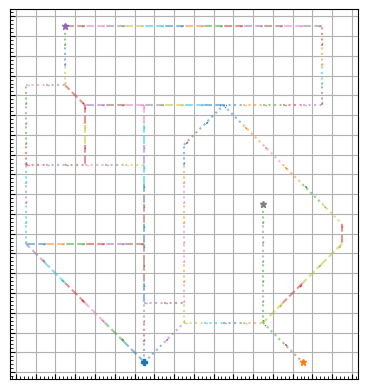

In [89]:
s = []
onramp = Onramp(6,0,(NW+N+NE)/3)
s.append(onramp)
s.append(Exit(14,0))
s.append(Road(5,1,NW))
s.append(Road(6,1,N))
s.append(Road(7,1,NE))
s.append(Road(13,1,SE))
s.append(Road(4,2,NW))
s.append(Road(6,2,N))
s.append(Road(8,2,(N+E)/2))
s.append(Road(9,2,E))
s.append(Road(10,2,E))
s.append(Road(11,2,E))
s.append(Road(12,2,(N+SE)/2))
s.append(Road(3,3,NW))
s.append(Road(6,3,E))
s.append(Road(7,3,E))
s.append(Road(8,3,N))
s.append(Road(12,3,N))
s.append(Road(13,3,SW))
s.append(Road(2,4,NW))
s.append(Road(6,4,S))
s.append(Road(8,4,N))
s.append(Road(12,4,N))
s.append(Road(14,4,SW))
s.append(Road(1,5,NW))
s.append(Road(6,5,S))
s.append(Road(8,5,N))
s.append(Road(12,5,N))
s.append(Road(15,5,SW))
s.append(Road(0,6,N))
s.append(Road(1,6,W))
s.append(Road(2,6,W))
s.append(Road(3,6,W))
s.append(Road(4,6,W))
s.append(Road(5,6,W))
s.append(Road(6,6,(W+S)/2))
s.append(Road(8,6,N))
s.append(Road(12,6,N))
s.append(Road(16,6,SW))
s.append(Road(0,7,N))
s.append(Road(6,7,S))
s.append(Road(8,7,N))
s.append(Road(12,7,N))
s.append(Road(16,7,S))
s.append(Road(0,8,N))
s.append(Road(6,8,S))
s.append(Road(8,8,N))
s.append(Exit(12,8))
s.append(Road(15,8,SE))
s.append(Road(0,9,N))
s.append(Road(6,9,S))
s.append(Road(8,9,N))
s.append(Road(14,9,SE))
s.append(Road(0,10,(N+E)/2))
s.append(Road(1,10,E))
s.append(Road(2,10,E))
s.append(Road(3,10,E))
s.append(Road(4,10,E))
s.append(Road(5,10,E))
s.append(Road(6,10,S))
s.append(Road(8,10,N))
s.append(Road(13,10,SE))
s.append(Road(0,11,N))
s.append(Road(3,11,S))
s.append(Road(6,11,S))
s.append(Road(8,11,NE))
s.append(Road(12,11,SE))
s.append(Road(0,12,N))
s.append(Road(3,12,S))
s.append(Road(6,12,S))
s.append(Road(9,12,NE))
s.append(Road(11,12,SE))
s.append(Road(0,13,N))
s.append(Road(3,13,(S+NW)/2))
s.append(Road(4,13,W))
s.append(Road(5,13,W))
s.append(Road(6,13,(S+W)/2))
s.append(Road(7,13,W))
s.append(Road(8,13,W))
s.append(Road(9,13,W))
s.append(Road(10,13,(W+E+SE)/3))
s.append(Road(11,13,E))
s.append(Road(12,13,E))
s.append(Road(13,13,E))
s.append(Road(14,13,E))
s.append(Road(15,13,N))
s.append(Road(0,14,E))
s.append(Road(1,14,E))
s.append(Road(2,14,N))
s.append(Road(15,14,N))
s.append(Road(2,15,N))
s.append(Road(15,15,N))
s.append(Road(2,16,N))
s.append(Road(15,16,N))
s.append(Exit(2,17))
s.append(Road(3,17,W))
s.append(Road(4,17,W))
s.append(Road(5,17,W))
s.append(Road(6,17,W))
s.append(Road(7,17,W))
s.append(Road(8,17,W))
s.append(Road(9,17,W))
s.append(Road(10,17,W))
s.append(Road(11,17,W))
s.append(Road(12,17,W))
s.append(Road(13,17,W))
s.append(Road(14,17,W))
s.append(Road(15,17,W))
# s.append(Onramp(10,1,N))


w = World(tiles=s, cars=[])
w.draw(markersize=5)


[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 0 idx 4 (prev 0.0) of Road(6,1,occupied=False) to 0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 1 idx 5 (prev 0.0) of Road(7,1,occupied=False) to 0
0.0 [0. 1. 0. 0. 0. 0. 0. 0. 0.] [1]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
changing neighbor 7 idx 3 (prev 0.0) of Road(5,1,occupied=False) to 0
0.0 [0. 0. 0. 0. 0. 0. 0. 1. 0.] [7]


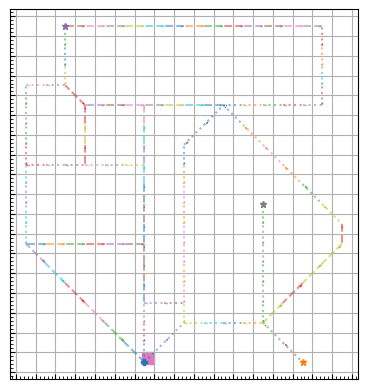

driving order: [0]
car <car.Car object at 0x00000136DF5ED850>: I'm going to Road(5,1,occupied=False)!
changing neighbor 0 idx 4 (prev 0.0) of Road(6,1,occupied=False) to 0.0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
changing neighbor 1 idx 5 (prev 0.0) of Road(7,1,occupied=False) to 0.0
0.0 [0. 1. 0. 0. 0. 0. 0. 0. 0.] [1]
changing neighbor 7 idx 3 (prev 0.0) of Road(5,1,occupied=False) to 0.0
0.0 [0. 0. 0. 0. 0. 0. 0. 1. 0.] [7]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 1 idx 5 (prev 0.0) of Road(6,2,occupied=False) to 0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
changing neighbor 2 idx 6 (prev 0.0) of Road(6,1,occupied=False) to 0
0.0 [1. 0. 0. 0. 0. 0. 0. 0. 0.] [0]
[0.33333333 0.33333333 0.         0.         0.         0.
 0.         0.33333333 0.        ]
changing neighbor 3 idx 7 (prev 0.3333333333333333) of Road(6,0,occupied=False) to 0
0.3333333333333333 [0.5 0.5 0.  0.  0.  0.  0.  0.  0. ] [0 1]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
changing neighbor 7 idx 3 (p

In [90]:
c=Car(s[0],desired_speed=5)
w.add_car(c)
w.run(100,draw=True,outpath=out("highway.gif"),markersize=5)

In [91]:
w.car_info_packets

[array([[0, 5, 1]]),
 array([[1, 7, 1],
        [0, 4, 2]]),
 array([[0, 3, 3],
        [2, 6, 1],
        [1, 8, 2]]),
 array([[0, 2, 4],
        [3, 5, 1],
        [1, 9, 2],
        [2, 6, 2]]),
 array([[ 3,  4,  2],
        [ 2,  6,  3],
        [ 0,  1,  5],
        [ 4,  5,  1],
        [ 1, 10,  2]]),
 array([[ 0,  0,  6],
        [ 1, 11,  2],
        [ 3,  3,  3],
        [ 4,  4,  2],
        [ 2,  7,  3],
        [ 5,  5,  1]]),
 array([[ 1, 12,  2],
        [ 6,  7,  1],
        [ 0,  0,  7],
        [ 4,  4,  2],
        [ 5,  5,  1],
        [ 3,  2,  4],
        [ 2,  8,  3]]),
 array([[ 0,  0,  8],
        [ 4,  3,  3],
        [ 5,  4,  2],
        [ 1, 13,  1],
        [ 2,  8,  4],
        [ 3,  1,  5],
        [ 7,  6,  1],
        [ 6,  8,  2]]),
 array([[ 6,  9,  2],
        [ 5,  4,  2],
        [ 4,  2,  4],
        [ 7,  6,  2],
        [ 2,  8,  5],
        [ 0,  0,  9],
        [ 3,  0,  6],
        [ 8,  6,  1],
        [ 1, 14,  0]]),
 array([[ 0,  0, 10],


In [92]:
car_map.shape

(18, 17)

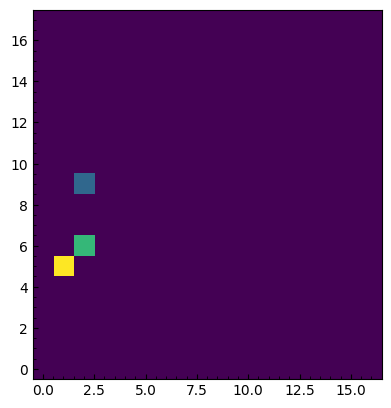

In [93]:
car_loc = w.car_info_packets[3]
car_map = np.zeros((w.max_y+1,w.max_x+1))
car_map[car_loc[:,1],car_loc[:,2]] = car_loc[:,0]
plt.imshow(car_map,origin="lower")

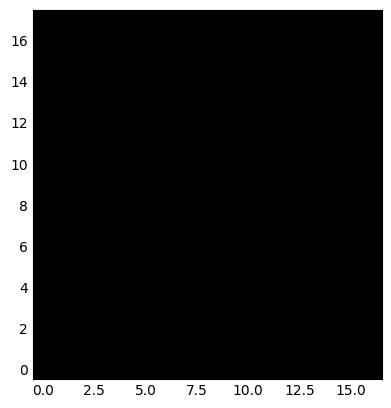

In [95]:
fig, ax = plt.subplots()
cumulative = np.zeros((w.max_y+1,w.max_x+1))

c = np.zeros(len(w._tiles))
c[onramp.index] = 1
mkov_locs = [np.array(c, copy=True)]

def update(frame):
    global cumulative, mkov_locs
    ax.cla()
    car_loc = w.car_info_packets[frame]
    car_map = np.zeros((w.max_y+1,w.max_x+1))
    car_locs = np.zeros((w.max_y+1,w.max_x+1))
    car_map[car_loc[:,2],car_loc[:,1]] = car_loc[:,0]
    car_locs[car_loc[:,2],car_loc[:,1]] = 1 
    cumulative += car_locs / max(len(car_loc),1)
    mkov_locs.append(w.markov.T@mkov_locs[-1])
    ax.imshow(car_map,origin="lower",cmap="inferno")

ani = animation.FuncAnimation(fig,update,frames=len(w.car_info_packets),interval=100)
ani.save(filename="car_heatmap.gif", writer="pillow",dpi=150)

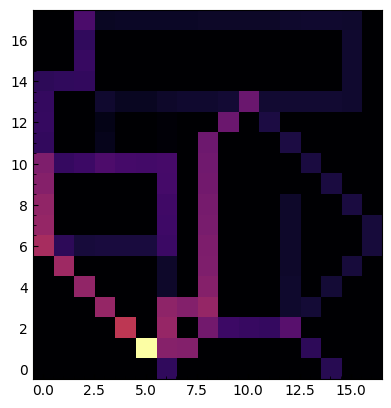

In [96]:
plt.imshow(cumulative,origin="lower",cmap="inferno")

In [102]:
mkov_locs = np.array(mkov_locs)
cumulative_mkov_car_locs = np.sum(np.array(mkov_locs),axis=0)
cumulative_mkov = np.zeros((w.max_y+1,w.max_x+1))
for i,t in enumerate(w._tiles):
    cumulative_mkov[t.y,t.x] = cumulative_mkov_car_locs[i]

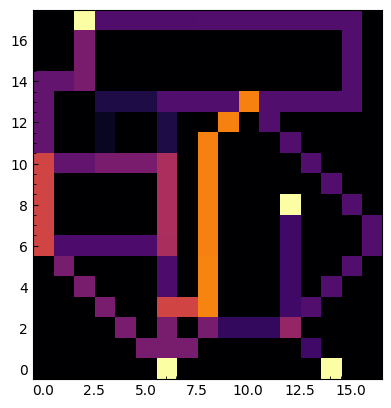

In [104]:
plt.imshow(cumulative_mkov,origin="lower",cmap="inferno",vmax=1)

In [ ]:
car_loc[:,[1,2]]

In [ ]:
car_loc[:,1]